In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
from scipy import stats

matplotlib.rcParams["axes.formatter.useoffset"] = False
pd.set_option('max_colwidth',200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

In [2]:
sales = pd.read_csv('raw_sales.csv', parse_dates= ['datesold'], encoding='utf-8-sig')
raw_sales_data = sales[(~sales['datesold'].dt.year.isin([2007, 2019])) & (sales['bedrooms'] != 0)]

In [3]:
# Calculating z-scores for 'price' column
z_scores = np.abs(stats.zscore(raw_sales_data['price']))

# Filtering abnormal data based on z-score threshold
threshold = 3
df = raw_sales_data[z_scores < threshold]

In [4]:
##### Mid-term #####

# df1 = pd.pivot_table(df, index=df['datesold'].dt.year.rename('year'), columns='bedrooms', values='datesold', aggfunc='count')

# # Color mapping for bedrooms
# colors = ['b', 'g', 'r', 'c', 'm']

# # Plotting
# plt.figure(figsize=(10, 6))

# for i, col in enumerate(df1.columns):
#     plt.plot(df1.index, df1[col], marker='o', label=f'{col} bedrooms', color=colors[i])
#     for j, val in enumerate(df1[col]):
#         plt.text(df1.index[j], val + 10, str(val), ha='center', va='bottom', color=colors[i])

# plt.title('House Property Sales by Year')
# plt.xlabel('Year')
# plt.ylabel('Number of Sales')
# plt.legend(title='Bedrooms')
# plt.xticks(df1.index)
    
# plt.grid(False)
# plt.tight_layout()

# plt.show()

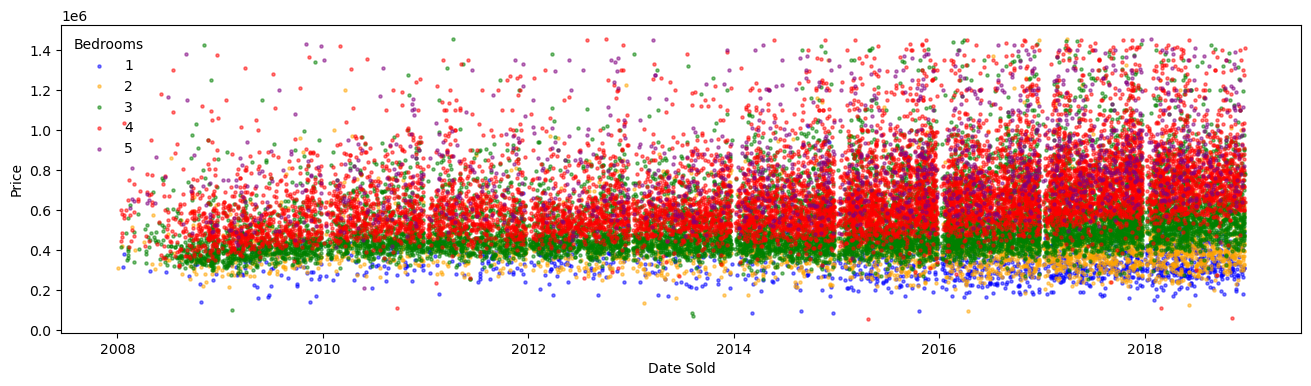

In [5]:
# Scatter plot
plt.figure(figsize=(16, 4))
colors = ['blue', 'orange', 'green', 'red', 'purple']
for i, bedroom_count in enumerate(range(1, 6)):
    data = df[df['bedrooms'] == bedroom_count]
    plt.scatter(data['datesold'], data['price'], label=f'{bedroom_count}', color=colors[i], alpha=0.5, s=5)

# plt.title('Sale Prices Scatter Plot by Bedrooms Count')
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.legend(title='Bedrooms', frameon=False)
plt.show()

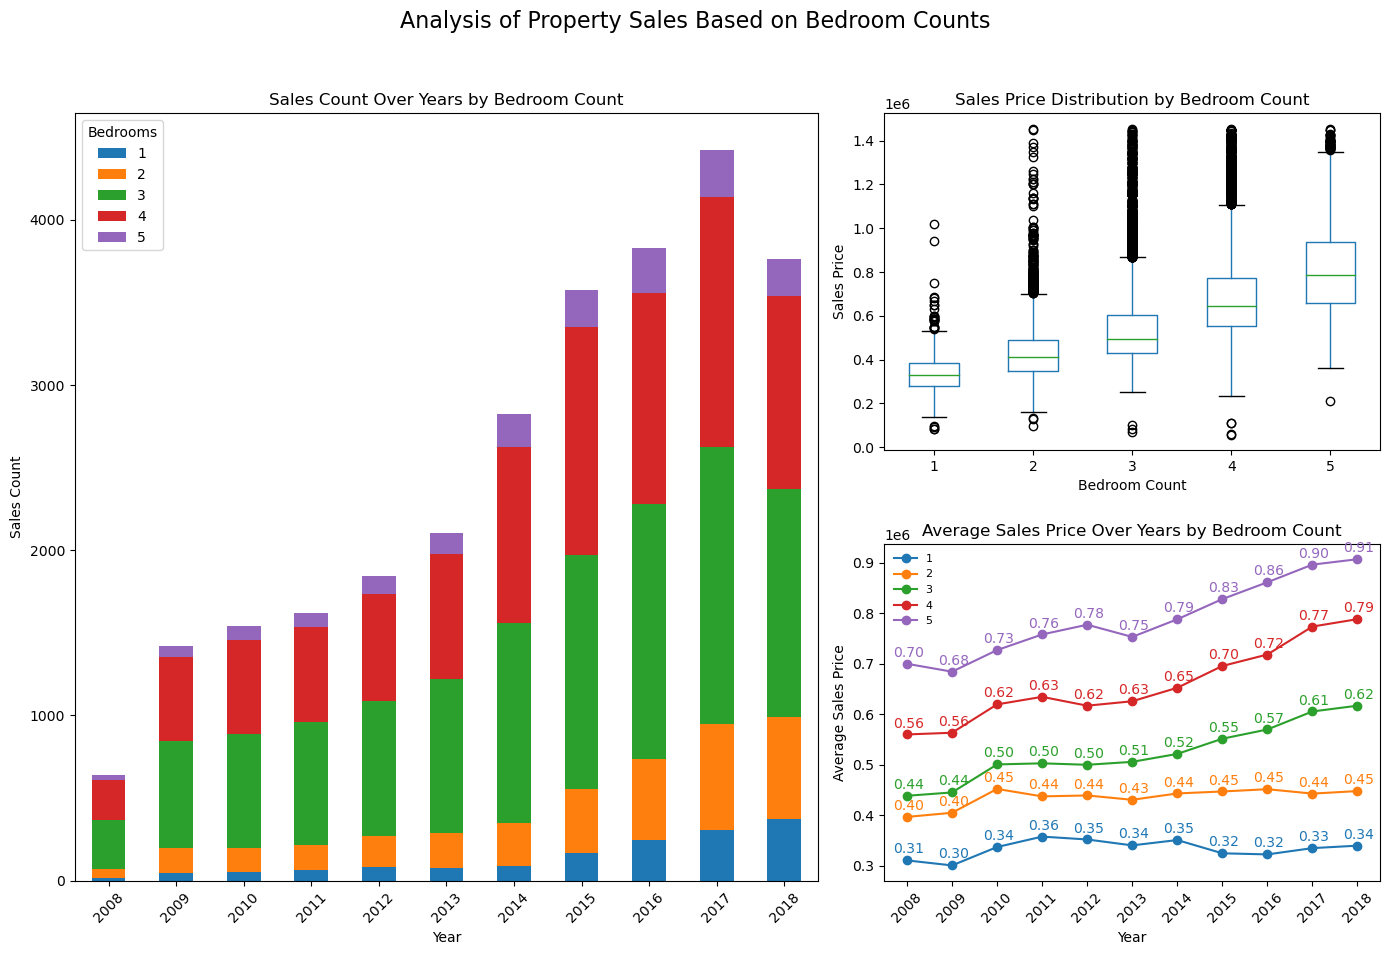

In [6]:
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1.5, 1], height_ratios=[3, 3])

# Lineplot plotting average sale prices by bedroom count (subplot 1)
df['year'] = df['datesold'].dt.year
agg_sales_price = df.groupby(['year', 'bedrooms'])['price'].mean().unstack()
ax1 = fig.add_subplot(gs[1, 1])
lines = ax1.plot(agg_sales_price, marker='o')

for line, column in zip(lines, agg_sales_price.columns):
    for i in range(len(line.get_xdata())):
        ax1.annotate(f"{agg_sales_price.loc[int(line.get_xdata()[i]), column]/10**6:.2f}",
                             (line.get_xdata()[i], line.get_ydata()[i]),
                             xytext=(-10, 5),
                             textcoords='offset points',
                             color=line.get_color())

ax1.set_title('Average Sales Price Over Years by Bedroom Count')
ax1.set_ylabel('Average Sales Price')
ax1.set_xlabel('Year')
legend_labels = [f'{count}' for count in agg_sales_price.columns]
ax1.legend(legend_labels, loc='upper left', frameon=False, prop={'size': 8})
ax1.set_xticks(agg_sales_price.index)
ax1.set_xticklabels(agg_sales_price.index, rotation=45)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(6,6))

# Boxplot showing the distribution of sale prices by bedroom count (subplot 2)
ax2 = fig.add_subplot(gs[0, 1])
ax2 = df.boxplot(column='price', by='bedrooms', grid=False, ax=ax2)
ax2.set_title('Sales Price Distribution by Bedroom Count')
ax2.set_ylabel('Sales Price')
ax2.set_xlabel('Bedroom Count')

# Barplot counting sales by year and bedroom count (subplot 3)
ax3 = fig.add_subplot(gs[:, 0])
agg_sales_count = df.groupby(['year', 'bedrooms']).size().unstack().fillna(0)
plot3 = agg_sales_count.plot(kind='bar', stacked=True, ax=ax3)
ax3.set_title('Sales Count Over Years by Bedroom Count')
ax3.set_ylabel('Sales Count')
ax3.set_xlabel('Year')
legend_labels_sales = [f'{count}' for count in agg_sales_count.columns]
ax3.legend(legend_labels_sales, title='Bedrooms', loc='upper left')
ax3.set_xticklabels(agg_sales_count.index, rotation=45) 

# Adding main title to the integrated figure
plt.suptitle('Analysis of Property Sales Based on Bedroom Counts', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusts the subplot layout to fit the main title

plt.show()